In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import miniscope_utils_tf as tf_utils
from miniscope_model import Model as msu_model
import scipy as sc
import scipy.ndimage as ndim
import scipy.misc as misc
from scipy import signal
import scipy.io
from skimage.transform import resize as imresize
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from IPython import display
import cv2 as cv2

import os
from os import listdir
from os.path import isfile, join
import matplotlib.animation as animation

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [4]:
zernikes_index =[3,4,5,6,7,8,9,10,11,12,13,14]
model_opt = sc.io.loadmat('../designs/1kiter_l2_z3-14_atten_nanoscribe_v1_20190820_112303.mat')
xopt = model_opt['xpos'][0]
yopt = model_opt['ypos'][0]
ropt = model_opt['rlist'][0]
zern_list = zernikes_index
zern_coeffs = model_opt['zern_coeffs']
defocus_list_opt = model_opt['defocus_list'][0]
defocus_err_opt = model_opt['defocus_correction'][0]
atten_opt = model_opt['atten'][0][0]
defocus_list = 1./(1./defocus_list_opt + defocus_err_opt)

In [5]:
model = msu_model(Nlenslets = 37, aberrations = True, zernikes = zernikes_index,loss_type='none',psf_scale=1e2,
                  lenslet_CA=0.2e3,lenslet_spacing = 'uniform',psf_file='../psf_meas/psf_crop_nanoscribe_v1_re-registered_2xds.mat',incoherent_source = False)

In [6]:
model.zern_coefficients.assign(zern_coeffs)
model.xpos.assign(xopt)
model.ypos.assign(yopt)
model.rlist.assign(ropt)
model.atten.assign(atten_opt)



<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.0>

In [7]:
Trot,aper= tf_utils.make_lenslet_tf_zern(model)
psf_init_zstack = model.gen_psf_stack(Trot,aper,0,1./(1./defocus_list+model.defocus_offset))


In [12]:
def drawnow():
    display.display(plt.gcf())
    display.clear_output(wait=True)

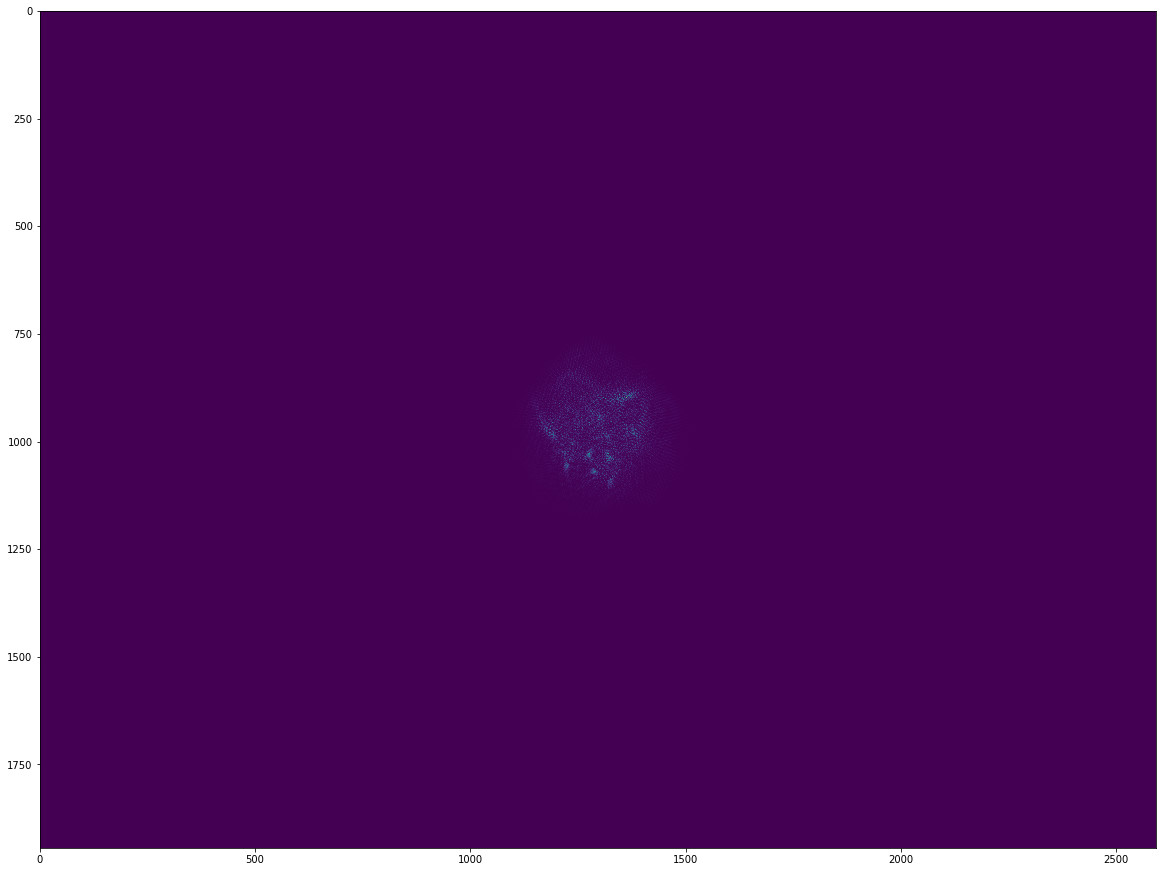

In [13]:

plt.figure(figsize=(20,20))
for n in range(model.Nz):
    plt.imshow(psf_init_zstack[n])
    drawnow()